In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from organs.gi import giInit, GI
from organs.index import Index

p = giInit()

45


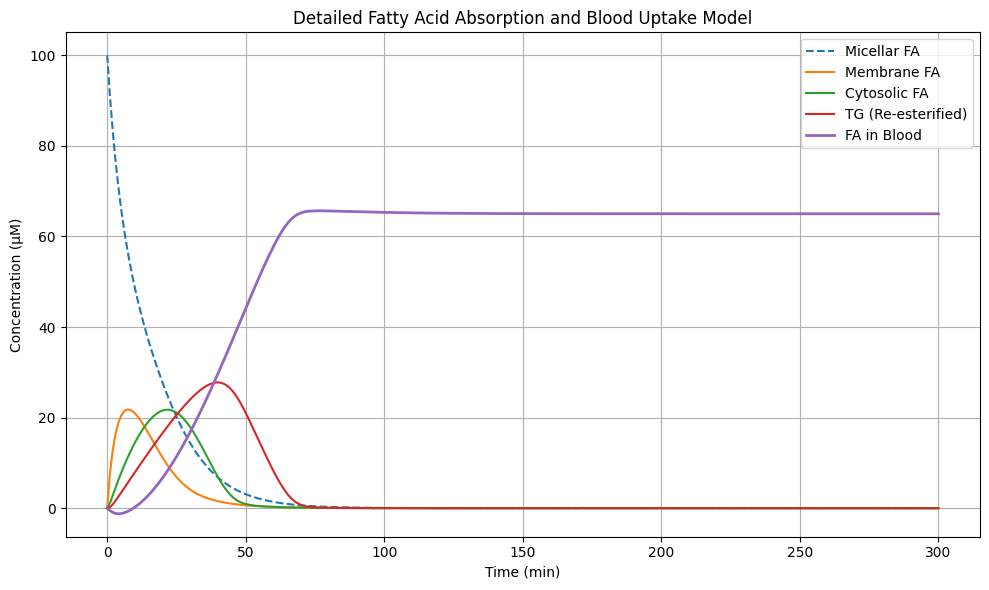

In [2]:
n = len(Index)
print(n)
y0 = np.zeros(n)

y0[Index.gut_glucose] = 50
y0[Index.plasma_glucose] = 5
y0[Index.gut_fructose] = 30
y0[Index.plasma_fructose] = 3
y0[Index.micellar_fattyacid] = 100

# Simulate
t_span = (0, 300)
t_eval = np.linspace(*t_span, 300)

solution = solve_ivp(fun=lambda t, y: GI(t, y, p),
                     t_span=t_span,
                     y0=y0,
                     t_eval=t_eval,
                     method='LSODA')
t = solution.t
y = solution.y
# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, y[Index.micellar_fattyacid], label='Micellar FA', linestyle='dashed')
plt.plot(t, y[Index.membrane_fattyacid], label='Membrane FA')
plt.plot(t, y[Index.cytosol_fattyacid], label='Cytosolic FA')
plt.plot(t, y[Index.cytosol_TAG], label='TG (Re-esterified)')
plt.plot(t, y[Index.plasma_fattyacid], label='FA in Blood', linewidth=2)
plt.xlabel('Time (min)')
plt.ylabel('Concentration (µM)')
plt.title('Detailed Fatty Acid Absorption and Blood Uptake Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



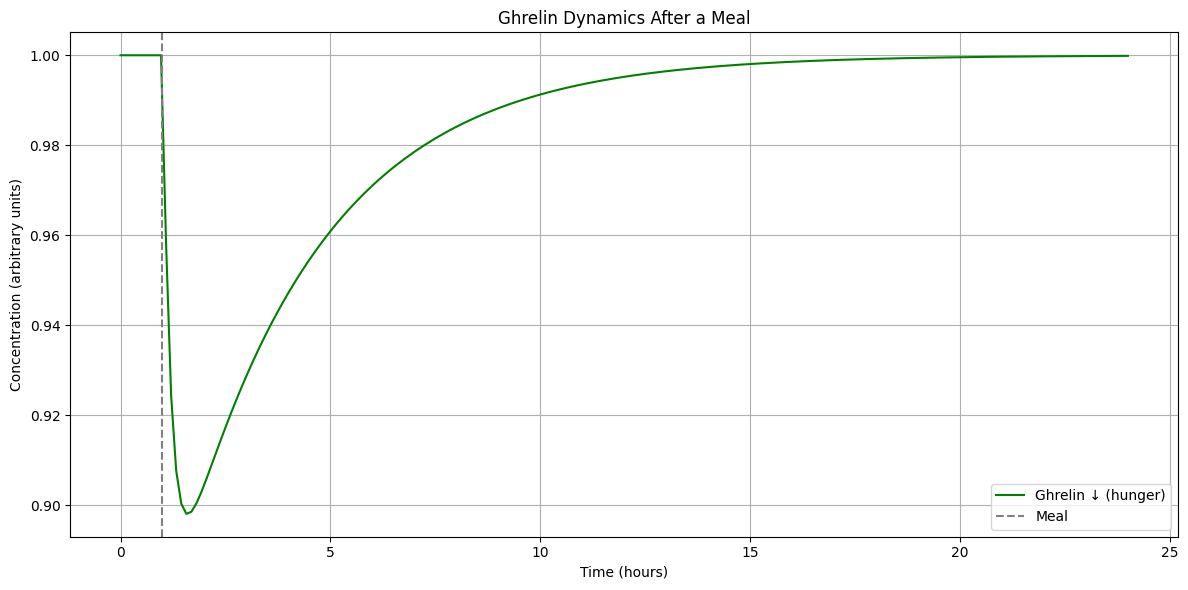

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#ghrelin = hunger hormone, drops after a meal

# Meal parameters
t_meal = 1.0  # Meal at 1 hour

# Time vector (0 to 5 hours)
t = np.linspace(0, 24, 200)


# GHRELIN: hunger hormone, drops after meal
def ghrelin_model(H, t):
    baseline = 1.0
    k_elim = 0.3
    
    # Apply meal effect only for times after t_meal (check if the current time `t` >= `t_meal`)
    meal_effect = -0.61 * np.exp(-5 * (t - t_meal)) if t >= t_meal else 0
    
    # Rate of change of ghrelin
    dHdt = -k_elim * (H - baseline) + meal_effect
    return dHdt


# Combined ODE system with only Ghrelin
def hormone_system(y, t):
    ghrelin = y[0]
    # Call the ghrelin model to calculate the rate of change
    return [ghrelin_model(ghrelin, t)]


# Initial value for Ghrelin (baseline)
y0 = [1.0]  # Initial concentration for ghrelin

# Solve the system using odeint
sol = odeint(hormone_system, y0, t)
ghrelin = sol.flatten()  # Flatten the result to a 1D array
 # Unpack the solution to get ghrelin values over time

# -------------------------------
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, ghrelin, label='Ghrelin ↓ (hunger)', color='green')
plt.axvline(t_meal, color='gray', linestyle='--', label='Meal')
plt.title('Ghrelin Dynamics After a Meal')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (arbitrary units)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


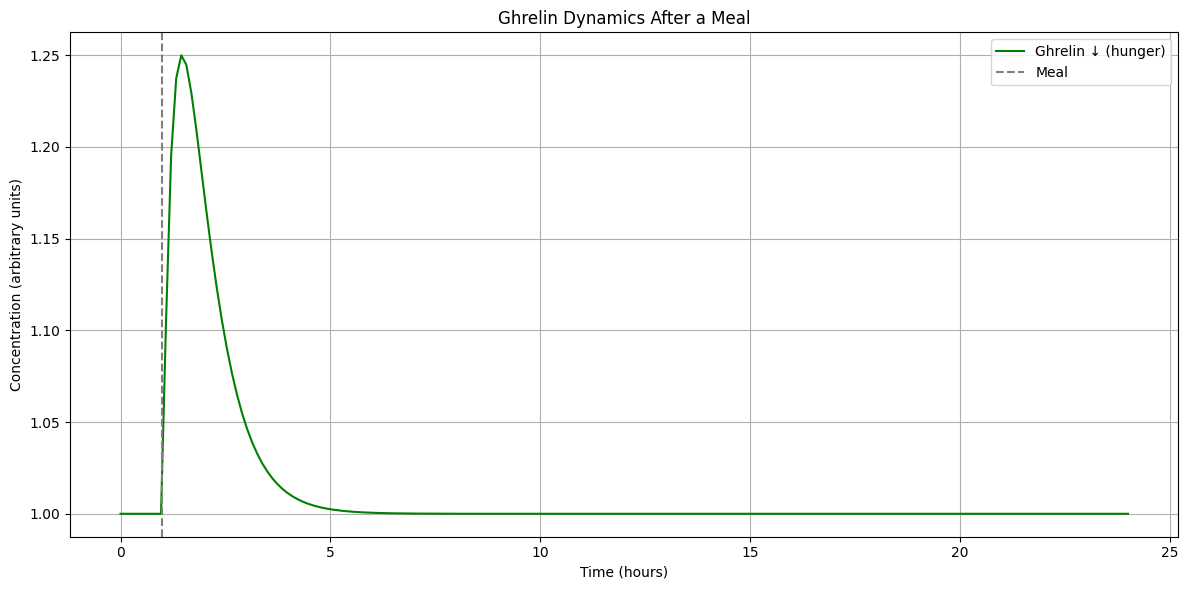

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# produced in intestines and enhances insulin secretion,inhibits glucagon release, slows gastric emptying, promotes feelings of fullness
# Meal parameters
t_meal = 1.0  # Meal at 1 hour

# Time vector (0 to 5 hours)
t = np.linspace(0, 24, 200)


# GHRELIN: hunger hormone, drops after meal
def glp1_model(H, t):
    baseline = 1
    k_elim = 1.5
    meal_effect = 1.5 * np.exp(-3 * (t - t_meal)) if t >= t_meal else 0
    dHdt = -k_elim * (H - baseline) + meal_effect
    return dHdt
#1.5 is a guess, have not found how much it increases yet

# Combined ODE system with only Ghrelin
def hormone_system(y, t):
    glp1 = y[0]
    # Call the ghrelin model to calculate the rate of change
    return [glp1_model(glp1, t)]


# Initial value for Ghrelin (baseline)
y0 = [1.0]  # Initial concentration for ghrelin

# Solve the system using odeint
sol = odeint(hormone_system, y0, t)
ghrelin = sol.flatten()  # Flatten the result to a 1D array
 # Unpack the solution to get ghrelin values over time

# -------------------------------
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, ghrelin, label='Ghrelin ↓ (hunger)', color='green')
plt.axvline(t_meal, color='gray', linestyle='--', label='Meal')
plt.title('Ghrelin Dynamics After a Meal')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (arbitrary units)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
